**CREATING HISTORICAL DATA**


In [1]:
import pandas as pd
import random
from datetime import datetime

num_samples = 10000

air_quality_range = (0, 100)
humidity_range = (40, 80)
temperature_range = (10, 30)
data = []
for _ in range(num_samples):
    date = datetime.now().date()
    air_quality = random.uniform(*air_quality_range)
    humidity = random.randint(*humidity_range)
    temperature = random.uniform(*temperature_range)
    if air_quality >= 70 and humidity >= 50 and temperature >= 15:
        environmental_state = 'Normal'
    else:
        environmental_state = 'Abnormal'
    data.append({
        'date': date,
        'air_quality': air_quality,
        'humidity': humidity,
        'temperature': temperature,
        'environment_state': environmental_state
    })

df = pd.DataFrame(data)
df.to_csv('environment_data.csv', index=False)


In [2]:
pip install matplotlibpip install sklearnpip install seabornpip install requests_htmlpip install pandaspip install randompip install datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.3 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=ee68d0a7481d49dfda1b7eca093d33d4ff7253c1997e99d35b78c450f2cdc988
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


**EXTRACTING THE REAL TIME CLIMATE DATA**


In [3]:
from requests_html import HTMLSession

s = HTMLSession()

query = 'london'
url =  f'https://aqicn.org/city/{query}'
r = s.get(url,headers= {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'})
air_quality = r.html.find('div#aqiwgtvalue',first=True).text.split()
humidity = r.html.find('td#cur_h',first=True).text.split()
temperature = r.html.find('td#cur_t',first=True).text.split()
humidity = r.html.find('td#cur_h',first=True).text.split()
air_quality = air_quality[0]
humidity = humidity[0]
temperature = temperature[0]
print("Air Quality")
print(air_quality)
print("Humidity")
print(humidity)

print("Temperature")
print(temperature)

Air Quality
28
Humidity
58
Temperature
18


CONVERTING INTO CSV

In [4]:
test_data = {
    'date': [datetime.now().date() ],
    'temperature': [temperature],
    'humidity': [humidity],
    'air_quality': [air_quality],
}
test_df = pd.DataFrame(test_data)
test_df.to_csv('test_environment_data.csv', index=False)

LINEAR REGRESSION AND PREDICTING THE ENVIROMENT DATA

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
data = pd.read_csv('environment_data.csv')
X = data.drop(['environment_state', 'date'], axis=1)
y = data['environment_state']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()

model = LinearRegression()
model.fit(X_train_scaled, y_train_encoded)

new_data = pd.read_csv('test_environment_data.csv')

new_data = new_data[X_train.columns]

new_data_scaled = scaler.transform(new_data)

predictions_encoded = model.predict(new_data_scaled)

predictions = encoder.inverse_transform(predictions_encoded)
print(predictions)


[['Abnormal']]


**REAL TIME INSIGHTS & VISUALISATIONS**

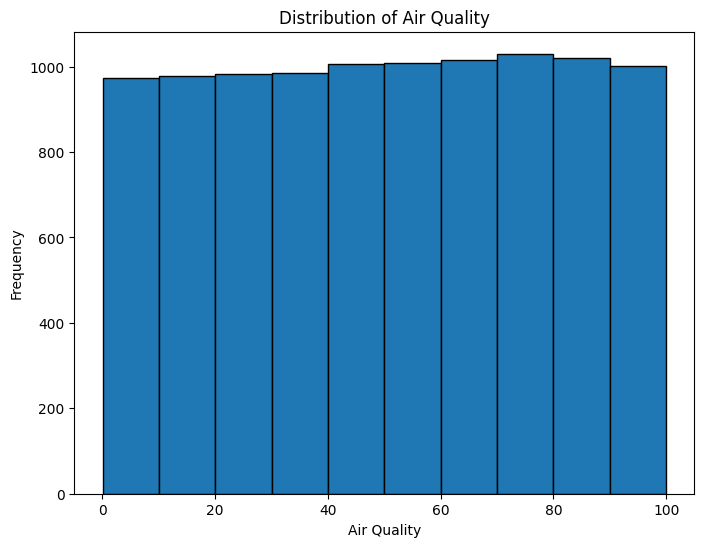

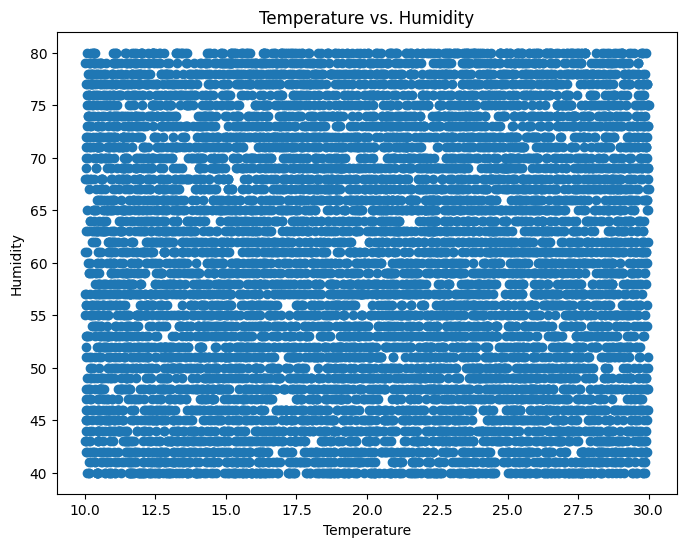

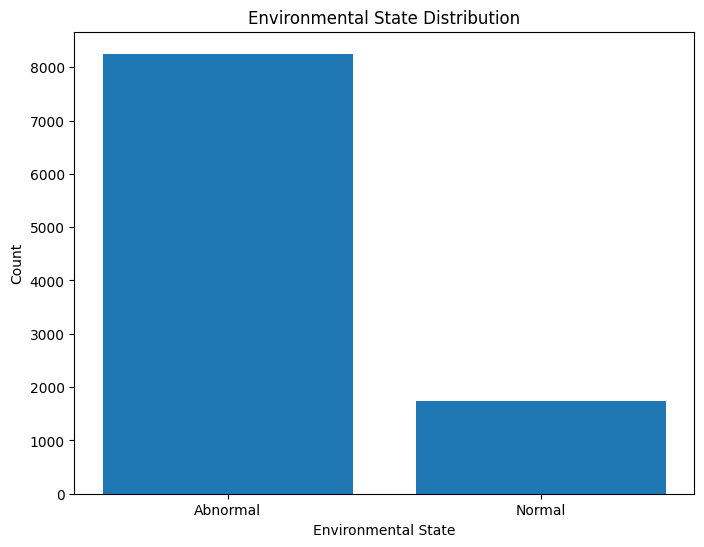

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('environment_data.csv')

plt.figure(figsize=(8, 6))
plt.hist(data['air_quality'], bins=10, edgecolor='black')
plt.xlabel('Air Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Air Quality')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(data['temperature'], data['humidity'])
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Temperature vs. Humidity')
plt.show()

state_counts = data['environment_state'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(state_counts.index, state_counts.values)
plt.xlabel('Environmental State')
plt.ylabel('Count')
plt.title('Environmental State Distribution')
plt.show()


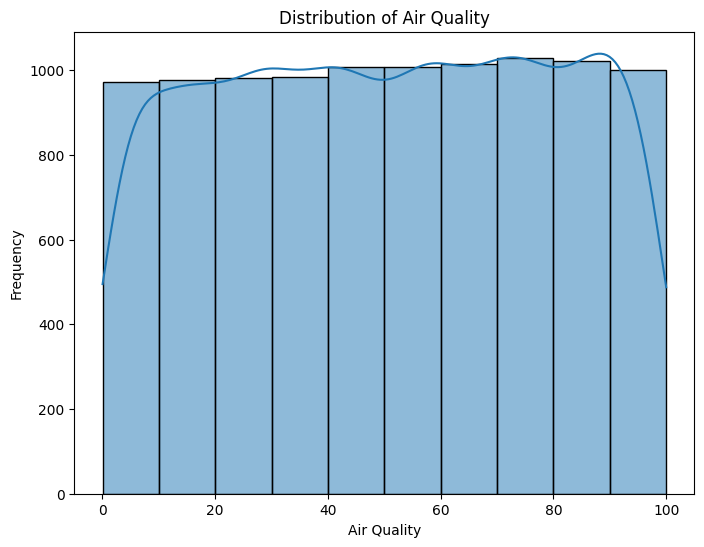

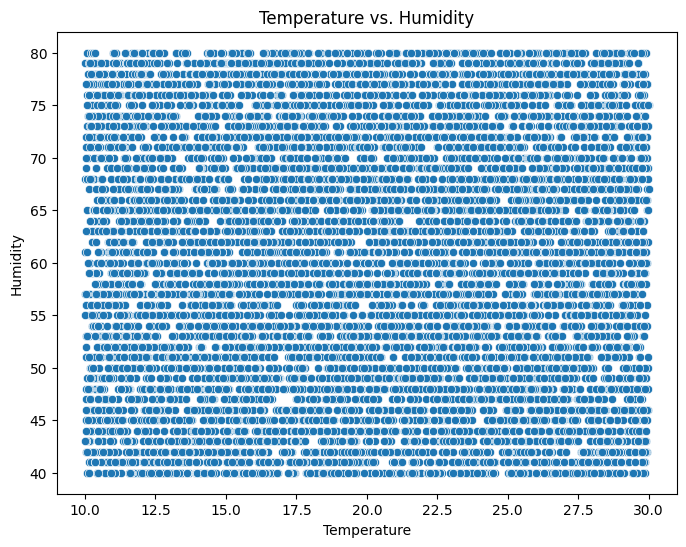

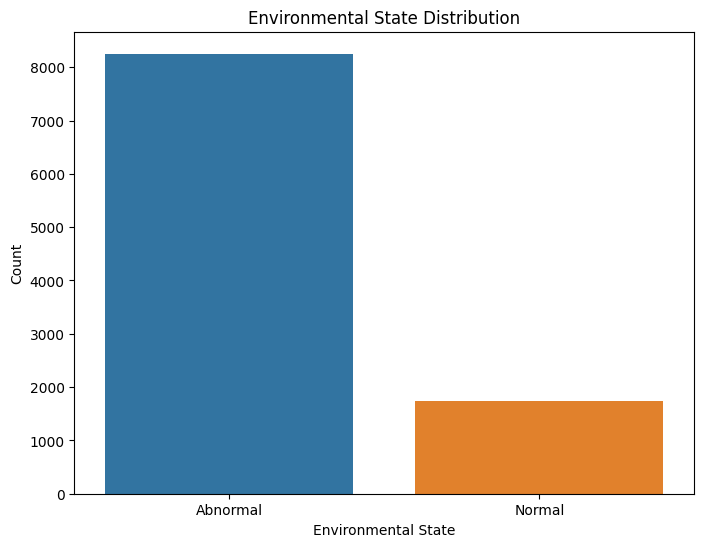

In [7]:
import pandas as pd
import seaborn as sns
data = pd.read_csv('environment_data.csv')
plt.figure(figsize=(8, 6))
sns.histplot(data['air_quality'], bins=10, kde=True)
plt.xlabel('Air Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Air Quality')
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature', y='humidity', data=data)
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Temperature vs. Humidity')
plt.show()
state_counts = data['environment_state'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.xlabel('Environmental State')
plt.ylabel('Count')
plt.title('Environmental State Distribution')
plt.show()

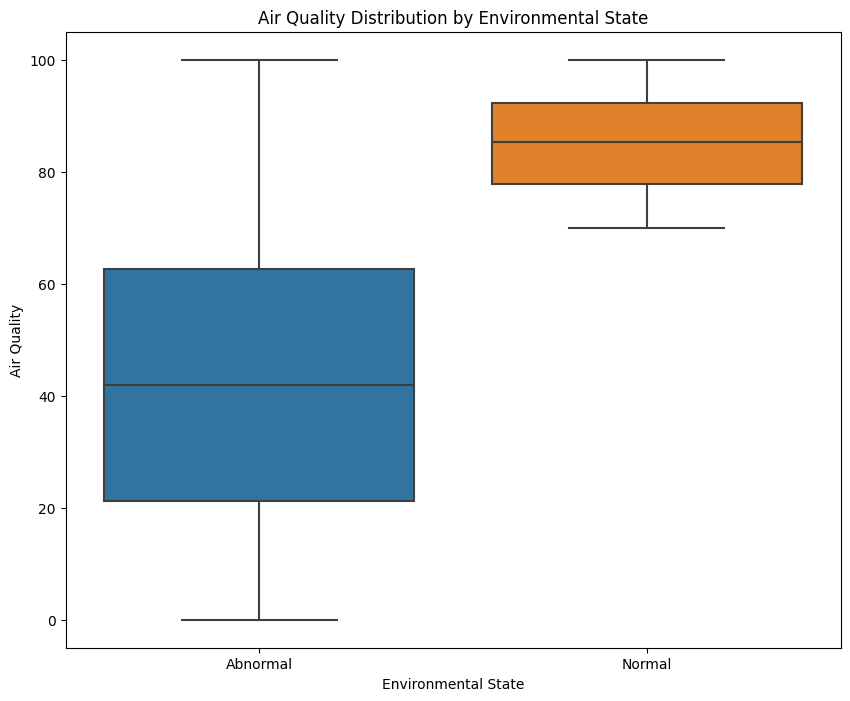

In [8]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='environment_state', y='air_quality', data=data)
plt.xlabel('Environmental State')
plt.ylabel('Air Quality')
plt.title('Air Quality Distribution by Environmental State')
plt.show()

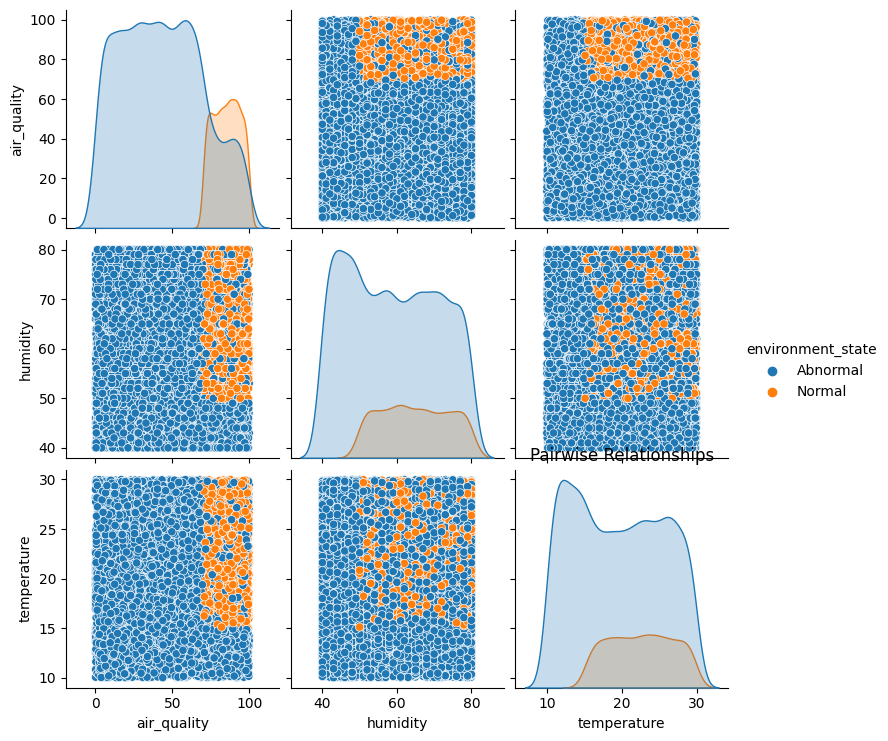

In [10]:
sns.pairplot(data, vars=['air_quality', 'humidity', 'temperature'], hue='environment_state')
plt.title('Pairwise Relationships')
plt.show()

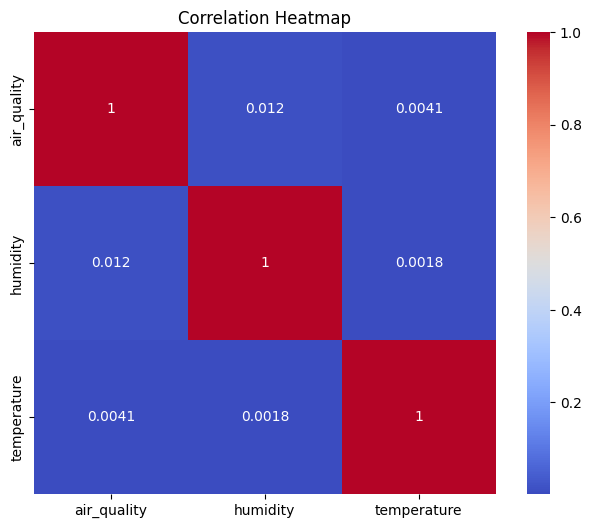

In [11]:
plt.figure(figsize=(8, 6))
corr_matrix = data[['air_quality', 'humidity', 'temperature']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()